In [1]:
import numpy as np
import scipy as sp
import pandas as pd

In [2]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# 1. Bisection Method

## 1.1 Introduction method

The bisection method is a root-finding method that applies to any continuous function for which one knows two values with opposite signs. The method consists of repeatedly bisecting the interval defined by these values and then selecting the subinterval in which the function changes sign, and therefore must contain a root. It is a very simple and robust method, but it is also relatively slow. Because of this, it is often used to obtain a rough approximation to a solution which is then used as a starting point for more rapidly converging methodsThe method is also called the interval halving method, the binary search method, or the dichotomy method.

## 1.2 Method

The method is applicable for numerically solving the equation $f(x) = 0$ for the real variable x, where f is a continuous function defined on an interval and where $f(a)$ and $f(b)$ have opposite signs. In this case a and b are said to bracket a root since, by the intermediate value theorem, the continuous function f must have at least one root in the interval (a, b).

At each step the method divides the interval in two parts/halves by computing the midpoint $c = \frac{a+b}{2}$ of the interval and the value of the function $f(c)$ at that point. If c itself is a root then the process has succeeded and stops. Otherwise, there are now only two possibilities: either $f(a)$ and $f(c)$ have opposite signs and bracket a root, or $f(c)$ and $f(b)$ have opposite signs and bracket a root. The method selects the subinterval that is guaranteed to be a bracket as the new interval to be used in the next step. In this way an interval that contains a zero of f is reduced in width by 50% at each step. The process is continued until the interval is sufficiently small.

Explicitly, if $f(c)=0$ then c may be taken as the solution and the process stops. Otherwise, if $f(a)$ and $f(c)$ have opposite signs, then the method sets c as the new value for b, and if $f(b)$ and $f(c)$ have opposite signs then the method sets c as the new a. In both cases, the new $f(a)$ and $f(b)$ have opposite signs, so the method is applicable to this smaller interval.

## 1.3 Algorithm

<pre><b>input:</b> Function <i>f</i>, 
       endpoint values <i>a</i>, <i>b</i>, 
       tolerance <i>TOL</i>, 
       maximum iterations <i>NMAX</i>
<b>conditions:</b> <i>a</i> &lt; <i>b</i>, 
            either <i>f</i>(<i>a</i>) &lt; 0 and <i>f</i>(<i>b</i>) &gt; 0 or <i>f</i>(<i>a</i>) &gt; 0 and <i>f</i>(<i>b</i>) &lt; 0
<b>output:</b> value which differs from a root of <i>f</i>(<i>x</i>) = 0 by less than <i>TOL</i>
 
<i>N</i> ← 1
<b>while</b> <i>N</i> ≤ <i>NMAX</i> <b>do</b> <i>// limit iterations to prevent infinite loop</i>
    <i>c</i> ← (<i>a</i> + <i>b</i>)/2 <i>// new midpoint</i>
    <b>if</b> <i>f</i>(<i>c</i>) = 0 or (<i>b</i> – <i>a</i>)/2 &lt; <i>TOL</i> <b>then</b> <i>// solution found</i>
        Output(<i>c</i>)
        <b>Stop</b>
    <b>end if</b>
    <i>N</i> ← <i>N</i> + 1 <i>// increment step counter</i>
    <b>if</b> sign(<i>f</i>(<i>c</i>)) = sign(<i>f</i>(<i>a</i>)) <b>then</b> <i>a</i> ← <i>c</i> <b>else</b> <i>b</i> ← <i>c</i> <i>// new interval</i>
<b>end while</b>
Output("Method failed.") <i>// max number of steps exceeded</i>
</pre>

## 1.4 Python program

In [3]:
def bisection_method(func, a, b, tolerance=1e-10, max_iterations=1000):
    if func(a) * func(b) >= 0:
        raise ValueError("Function values at endpoints must have opposite signs")
    
    for iteration in range(max_iterations):
        c = (a + b) / 2
        f_c = func(c)
        
        if abs(f_c) < tolerance or abs(b - a) / 2 < tolerance:
            return c
        
        if func(c) * func(a) < 0:
            b = c
        else:
            a = c
    
    raise Exception("Bisection method did not converge within the specified iterations")

## $f \longmapsto x: x^3 - 6x^2 -3x +5 , x \in \{ -5.0, +8.0 \}$

In [4]:
func = lambda x: x**3 -6*x**2 -3*x +5

In [27]:
# interval

a = -5.0
b = 8.0

In [28]:
func(a), func(b)

(-255.0, 109.0)

In [29]:
# Apply the bisection method
root = bisection_method(func, a, b)

In [30]:
root

6.348493934441649

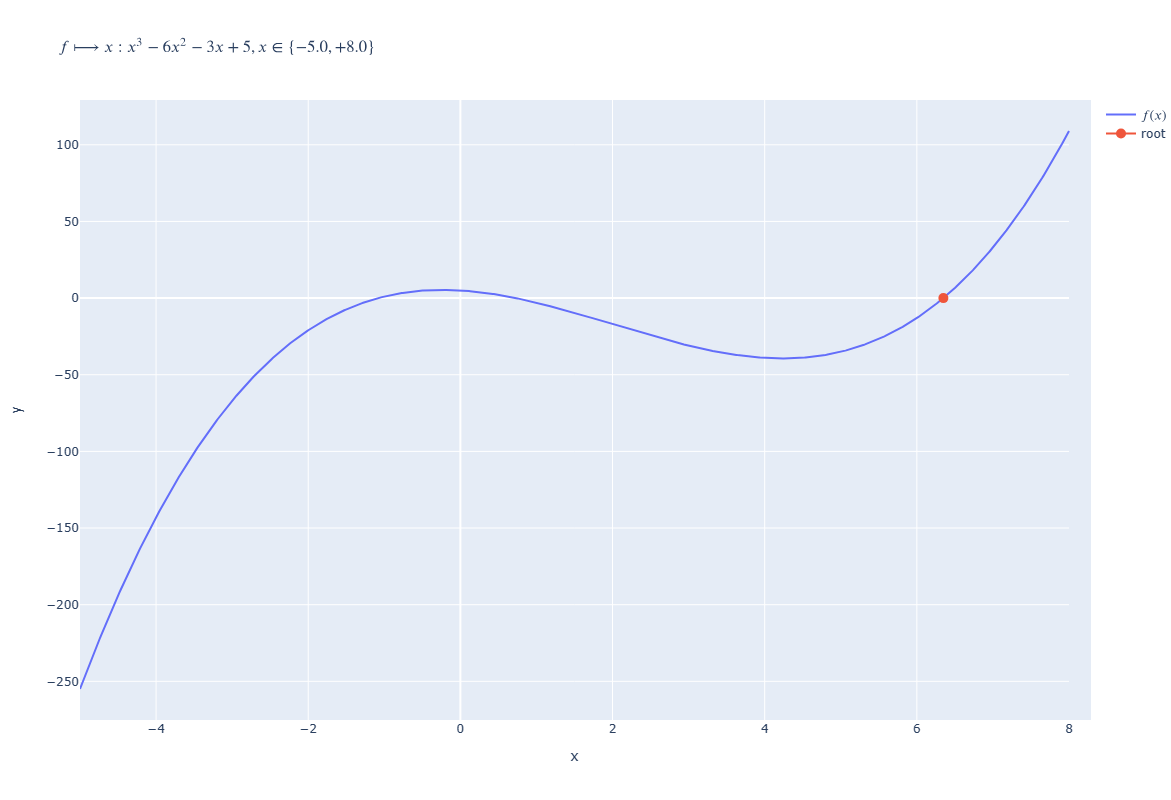

In [33]:
fig = go.Figure(data=[{'type': 'scatter', 'x': np.linspace(-5.0,8.0,1000), 'y': func(np.linspace(-5.0,8.0,1000)),
                       'name': '$f(x)$', 'showlegend':True}],
                layout = {'title': '$f \longmapsto x: x^3 - 6x^2 -3x +5 , x \in \{ -5.0, +8.0 \}$','height':800, 'width':800 })
fig.add_trace(go.Scatter(x=[root], y=[0], marker = {'size':10}, name = "root"))
fig.update_xaxes(title_text="x")
fig.update_yaxes(title_text="y")
fig.show()

# 2. Newton-Raphson Method

## 2.1 Introduction

The Newton-Raphson method which is also known as Newton’s method, is an iterative numerical method used to find the roots of a real-valued function. This formula is named after Sir Isaac Newton and Joseph Raphson, as they independently contributed to its development. Newton Raphson Method or Newton’s Method is an algorithm to approximate the roots of zeros of the real-valued functions, using guess for the first iteration ($x_0$) and then approximating the next iteration($x_1$) which is close to roots, using the following formula.

$$x_n = x_{n-1} – \frac{f(x_{n-1})}{f'(x_{n-1})}$$

Where, 

- $x_{n-1}$ is the estimated ($n-1$)th root of the function,
- $f(x_{n-1})$ is the value of the equation at ($n-1$)th estimated root, and
- $f'(x_{n-1})$ is the value of the first order derivative of the equation or function at $x_{n-1}$.

## 2.2 Newton-Raphson Method Algorithm

1. **Input**:
   - A real-valued function $f(x)$.
   - The derivative of the function $f'(x)$.
   - An initial guess $x_0$ for the root.
   - Tolerance $\varepsilon$ (a small positive number) to determine the stopping criterion.
   - Maximum number of iterations $N$ (optional).

2. **Algorithm**:
   1. Initialize $x = x_0$.
   2. For $i = 1$ to `N` (or until convergence):
      - Calculate $f(x)$ and $f'(x)$.
      - If $|f(x)| < \varepsilon$, return $x$ as the approximate root.
      - Update $x = x - \frac{f(x)}{f'(x)}$.
   3. If the loop completes without finding a root, indicate that the method did not converge within the specified iterations.

3. **Output**:
   - An approximate root $x$ of the function $f(x)$.

## 2.3 Python program

In [35]:
def newton_raphson(func, derivative, initial_guess, tolerance=1e-10, max_iterations=1000):
    x = initial_guess
    
    for iteration in range(max_iterations):
        f_x = func(x)
        f_prime_x = derivative(x)
        
        if abs(f_x) < tolerance:
            return x
        
        x = x - f_x / f_prime_x
    
    raise Exception("Newton-Raphson method did not converge within the specified iterations")


## $f \longmapsto x: - 6\sin(2x) -3\cos(x) +5 , x \in \{ -5.0, +8.0 \}$

In [59]:
f = lambda x: -6*np.sin(x*2) -3*np.cos(x) +5

In [60]:
df = lambda x: (f(x+1e-10) - f(x))/1e-10

In [61]:
initial_guess = 6.0

In [62]:
root = newton_raphson(f, df, initial_guess)

In [63]:
root

6.457109972736201

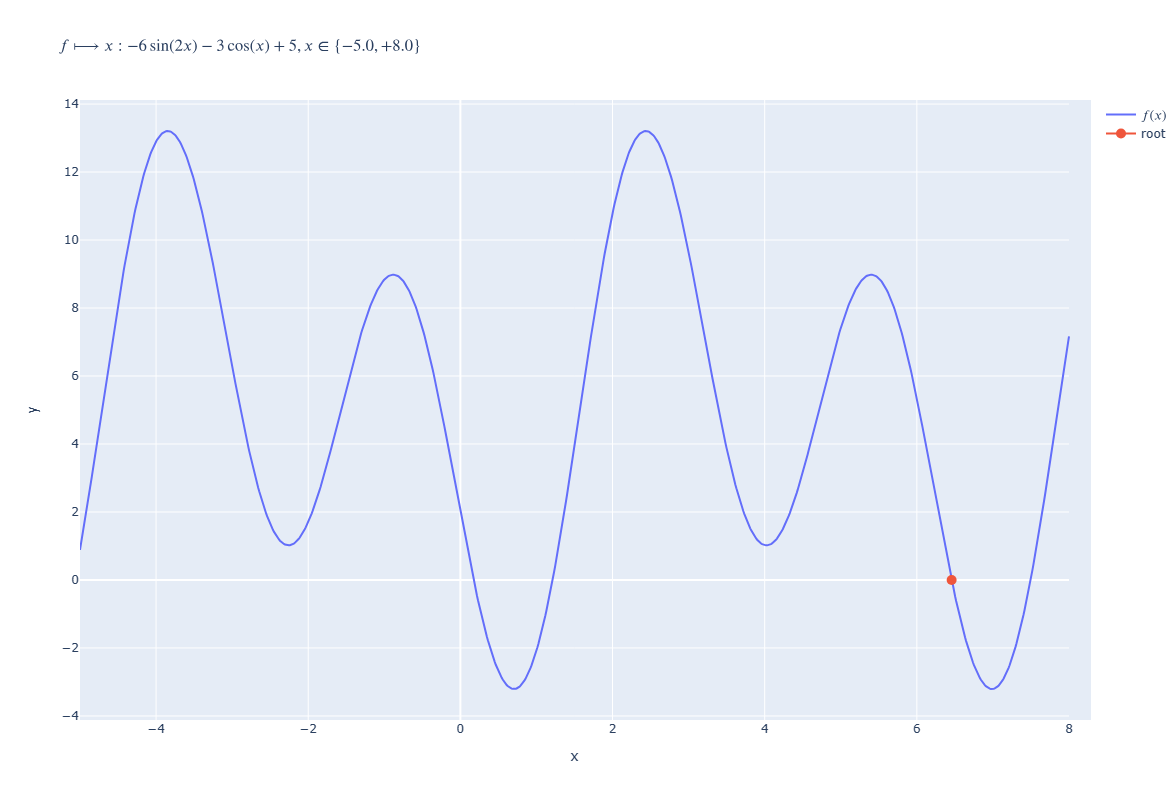

In [65]:
fig = go.Figure(data=[{'type': 'scatter', 'x': np.linspace(-5.0,8.0,1000), 'y': f(np.linspace(-5.0,8.0,1000)),
                       'name': '$f(x)$', 'showlegend':True}],
                layout = {'title': '$f \longmapsto x: - 6\sin(2x) -3\cos(x) +5 , x \in \{ -5.0, +8.0 \}$','height':800, 'width':800 })
fig.add_trace(go.Scatter(x=[root], y=[0], marker = {'size':10}, name = "root"))
fig.update_xaxes(title_text="x")
fig.update_yaxes(title_text="y")
fig.show()

# 3. Secant Method

## 3.1 Introduction

The secant method is a root-finding algorithm that uses a succession of roots of secant lines to better approximate a root of a function $f$. The secant method can be thought of as a finite-difference approximation of Newton's method.

## 3.2 Method

For finding a zero of a function $f$, the secant method is defined by the recurrence relation.

$$ x_{n}=x_{n-1}-f(x_{n-1}){\frac {x_{n-1}-x_{n-2}}{f(x_{n-1})-f(x_{n-2})}}={\frac {x_{n-2}f(x_{n-1})-x_{n-1}f(x_{n-2})}{f(x_{n-1})-f(x_{n-2})}}$$

As can be seen from this formula, two initial values $x_0$ and $x_1$ are required. Ideally, they should be chosen close to the desired zero.

## 3.3 Algorithm

<h4>Input</h4>
<ul>
    <li>A real-valued function \( f(x) \).</li>
    <li>Two initial guesses \( x_0 \) and \( x_1 \) for the root.</li>
    <li>Tolerance \( \epsilon \) (a small positive number) to determine the stopping criterion.</li>
    <li>Maximum number of iterations \( N \) (optional).</li>
</ul>

<h4>Algorithm</h4>
<ol>
    <li>Initialize \( f_{x0} = f(x_0) \) and \( f_{x1} = f(x_1) \).</li>
    <li>For \( i = 1 \) to \( N \) (or until convergence):
        <ul>
            <li>Calculate the next approximation \( x_{\text{next}} = x_1 - \frac{f_{x1} \cdot (x_1 - x_0)}{f_{x1} - f_{x0}} \).</li>
            <li>Calculate \( f_{\text{next}} = f(x_{\text{next}}) \).</li>
            <li>If \( |f_{\text{next}}| < \epsilon \), return \( x_{\text{next}} \) as the approximate root.</li>
            <li>Update \( x_0 = x_1 \), \( f_{x0} = f_{x1} \), \( x_1 = x_{\text{next}} \), and \( f_{x1} = f_{\text{next}} \).</li>
        </ul>
    </li>
    <li>If the loop completes without finding a root, indicate that the method did not converge within the specified iterations.</li>
</ol>

<h4>Output</h4>
<p>An approximate root \( x_{\text{next}} \) of the function \( f(x) \).</p>


## 3.4 Python Programming

In [89]:
def secant_method(func, x0, x1, tolerance=1e-10, max_iterations=1000):
    f_x0 = func(x0)
    f_x1 = func(x1)
    
    for iteration in range(max_iterations):
        x_next = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        f_next = func(x_next)
        
        if abs(f_next) < tolerance:
            return x_next
        
        x0 = x1
        f_x0 = f_x1
        x1 = x_next
        f_x1 = f_next
    
    raise Exception("Secant method did not converge within the specified iterations")


## $f \mapsto x: \sin\left(x\right)-\sin\left(2x\right)\tan\left(-x\right)\cos\left(\frac{1}{3}x\right), x \in \{ -2.0, +4.0 \}$

In [114]:
f = lambda x: np.sin(x)-np.sin(2*x)*np.tan(-x)*np.cos((1/3)*x)

In [91]:
# Initial guesses for the root
x0 = 1.0
x1 = 4.0

In [92]:
root = secant_method(f, x0, x1)

In [93]:
root

3.1415926535897807

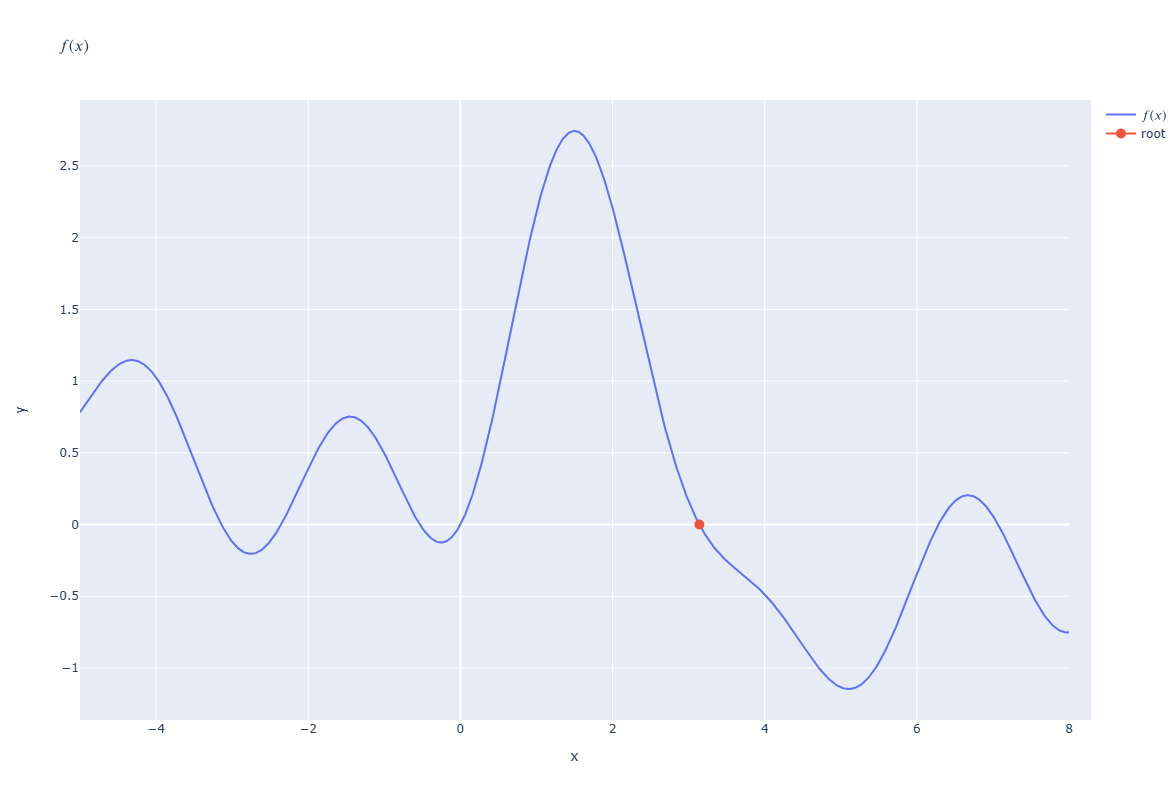

In [124]:
fig = go.Figure(data=[{'type': 'scatter', 'x': np.linspace(-5.0,8.0,1000), 'y': f(np.linspace(-5.0,8.0,1000)),
                       'name': '$f(x)$', 'showlegend':True}],
                layout = {'title': '$f(x)$',
                          'height':800, 'width':1100 })
fig.add_trace(go.Scatter(x=[root], y=[0], marker = {'size':10}, name = "root"))
fig.update_xaxes(title_text="x")
fig.update_yaxes(title_text="y")
fig.show()

# 4. Brent's Method

## 4.1 Introduction

 Brent's method is a hybrid root-finding algorithm combining the bisection method, the secant method and inverse quadratic interpolation. It has the reliability of bisection but it can be as quick as some of the less-reliable methods. The algorithm tries to use the potentially fast-converging secant method or inverse quadratic interpolation if possible, but it falls back to the more robust bisection method if necessary.

## 4.2 Method

Given a specific numerical tolerance $\delta$ , if the previous step used the bisection method, the inequality 
$|\delta |<|b_{k}-b_{k-1}|$ must hold to perform interpolation, otherwise the bisection method is performed and its result used for the next iteration.

If the previous step performed interpolation, then the inequality $|\delta |<|b_{k-1}-b_{k-2}|$ is used instead to perform the next action (to choose) interpolation (when inequality is true) or bisection method (when inequality is not true).

Also, if the previous step used the bisection method, the inequality 
$|s-b_{k}|<{\begin{matrix}{\frac {1}{2}}\end{matrix}}|b_{k}-b_{k-1}$ must hold, otherwise the bisection method is performed and its result used for the next iteration. If the previous step performed interpolation, then the inequality 
$|s-b_{k}|<{\begin{matrix}{\frac {1}{2}}\end{matrix}}|b_{k-1}-b_{k-2}|$ is used instead.

This modification ensures that at the kth iteration, a bisection step will be performed in at most $2\log _{2}(|b_{k-1}-b_{k-2}|/\delta )$ additional iterations, because the above conditions force consecutive interpolation step sizes to halve every two iterations, and after at most $2\log _{2}(|b_{k-1}-b_{k-2}|/\delta )$ iterations, the step size will be smaller than $\delta$ , which invokes a bisection step. Brent proved that his method requires at most $N^2$ iterations, where N denotes the number of iterations for the bisection method. If the function f is well-behaved, then Brent's method will usually proceed by either inverse quadratic or linear interpolation, in which case it will converge superlinearly.

## 4.3 Algorithm

<pre><b>input</b> <i>a</i>, <i>b</i>, and (a pointer to) a function for <i>f</i>
calculate <i>f</i>(<i>a</i>)
calculate <i>f</i>(<i>b</i>)
<b>if</b> <i>f</i>(<i>a</i>)<i>f</i>(<i>b</i>) ≥ 0 <b>then</b> 
    exit function because the root is not bracketed.
<b>end if</b>
<b>if</b> |<i>f</i>(<i>a</i>)| &lt; |<i>f</i>(<i>b</i>)| <b>then</b>
    swap (<i>a</i>,<i>b</i>)
<b>end if</b>
<i>c</i>&nbsp;:= <i>a</i>
<b>set</b> mflag
<b>repeat until</b> <i>f</i>(<i>b</i> or <i>s</i>) = 0 <b>or</b> |<i>b</i> − <i>a</i>| <b>is</b> small enough <i>(convergence)</i>
    <b>if</b> <i>f</i>(<i>a</i>) ≠ <i>f</i>(<i>c</i>) <b>and</b> <i>f</i>(<i>b</i>) ≠ <i>f</i>(<i>c</i>) <b>then</b>
        <span class="nowrap"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\textstyle s:={\frac {af(b)f(c)}{(f(a)-f(b))(f(a)-f(c))}}+{\frac {bf(a)f(c)}{(f(b)-f(a))(f(b)-f(c))}}+{\frac {cf(a)f(b)}{(f(c)-f(a))(f(c)-f(b))}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="false" scriptlevel="0">
        <mi>s</mi>
        <mo>:=</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow>
              <mi>a</mi>
              <mi>f</mi>
              <mo stretchy="false">(</mo>
              <mi>b</mi>
              <mo stretchy="false">)</mo>
              <mi>f</mi>
              <mo stretchy="false">(</mo>
              <mi>c</mi>
              <mo stretchy="false">)</mo>
            </mrow>
            <mrow>
              <mo stretchy="false">(</mo>
              <mi>f</mi>
              <mo stretchy="false">(</mo>
              <mi>a</mi>
              <mo stretchy="false">)</mo>
              <mo>−<!-- − --></mo>
              <mi>f</mi>
              <mo stretchy="false">(</mo>
              <mi>b</mi>
              <mo stretchy="false">)</mo>
              <mo stretchy="false">)</mo>
              <mo stretchy="false">(</mo>
              <mi>f</mi>
              <mo stretchy="false">(</mo>
              <mi>a</mi>
              <mo stretchy="false">)</mo>
              <mo>−<!-- − --></mo>
              <mi>f</mi>
              <mo stretchy="false">(</mo>
              <mi>c</mi>
              <mo stretchy="false">)</mo>
              <mo stretchy="false">)</mo>
            </mrow>
          </mfrac>
        </mrow>
        <mo>+</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow>
              <mi>b</mi>
              <mi>f</mi>
              <mo stretchy="false">(</mo>
              <mi>a</mi>
              <mo stretchy="false">)</mo>
              <mi>f</mi>
              <mo stretchy="false">(</mo>
              <mi>c</mi>
              <mo stretchy="false">)</mo>
            </mrow>
            <mrow>
              <mo stretchy="false">(</mo>
              <mi>f</mi>
              <mo stretchy="false">(</mo>
              <mi>b</mi>
              <mo stretchy="false">)</mo>
              <mo>−<!-- − --></mo>
              <mi>f</mi>
              <mo stretchy="false">(</mo>
              <mi>a</mi>
              <mo stretchy="false">)</mo>
              <mo stretchy="false">)</mo>
              <mo stretchy="false">(</mo>
              <mi>f</mi>
              <mo stretchy="false">(</mo>
              <mi>b</mi>
              <mo stretchy="false">)</mo>
              <mo>−<!-- − --></mo>
              <mi>f</mi>
              <mo stretchy="false">(</mo>
              <mi>c</mi>
              <mo stretchy="false">)</mo>
              <mo stretchy="false">)</mo>
            </mrow>
          </mfrac>
        </mrow>
        <mo>+</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow>
              <mi>c</mi>
              <mi>f</mi>
              <mo stretchy="false">(</mo>
              <mi>a</mi>
              <mo stretchy="false">)</mo>
              <mi>f</mi>
              <mo stretchy="false">(</mo>
              <mi>b</mi>
              <mo stretchy="false">)</mo>
            </mrow>
            <mrow>
              <mo stretchy="false">(</mo>
              <mi>f</mi>
              <mo stretchy="false">(</mo>
              <mi>c</mi>
              <mo stretchy="false">)</mo>
              <mo>−<!-- − --></mo>
              <mi>f</mi>
              <mo stretchy="false">(</mo>
              <mi>a</mi>
              <mo stretchy="false">)</mo>
              <mo stretchy="false">)</mo>
              <mo stretchy="false">(</mo>
              <mi>f</mi>
              <mo stretchy="false">(</mo>
              <mi>c</mi>
              <mo stretchy="false">)</mo>
              <mo>−<!-- − --></mo>
              <mi>f</mi>
              <mo stretchy="false">(</mo>
              <mi>b</mi>
              <mo stretchy="false">)</mo>
              <mo stretchy="false">)</mo>
            </mrow>
          </mfrac>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\textstyle s:={\frac {af(b)f(c)}{(f(a)-f(b))(f(a)-f(c))}}+{\frac {bf(a)f(c)}{(f(b)-f(a))(f(b)-f(c))}}+{\frac {cf(a)f(b)}{(f(c)-f(a))(f(c)-f(b))}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/952c73a0e046db1bd44ec79ec98858d2351a417b" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -1.838ex; width:63.722ex; height:4.843ex;" alt="{\textstyle s:={\frac {af(b)f(c)}{(f(a)-f(b))(f(a)-f(c))}}+{\frac {bf(a)f(c)}{(f(b)-f(a))(f(b)-f(c))}}+{\frac {cf(a)f(b)}{(f(c)-f(a))(f(c)-f(b))}}}"></span></span> <i>(<a href="/wiki/Inverse_quadratic_interpolation" title="Inverse quadratic interpolation">inverse quadratic interpolation</a>)</i>
    <b>else</b>
        <span class="nowrap"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\textstyle s:=b-f(b){\frac {b-a}{f(b)-f(a)}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="false" scriptlevel="0">
        <mi>s</mi>
        <mo>:=</mo>
        <mi>b</mi>
        <mo>−<!-- − --></mo>
        <mi>f</mi>
        <mo stretchy="false">(</mo>
        <mi>b</mi>
        <mo stretchy="false">)</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow>
              <mi>b</mi>
              <mo>−<!-- − --></mo>
              <mi>a</mi>
            </mrow>
            <mrow>
              <mi>f</mi>
              <mo stretchy="false">(</mo>
              <mi>b</mi>
              <mo stretchy="false">)</mo>
              <mo>−<!-- − --></mo>
              <mi>f</mi>
              <mo stretchy="false">(</mo>
              <mi>a</mi>
              <mo stretchy="false">)</mo>
            </mrow>
          </mfrac>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\textstyle s:=b-f(b){\frac {b-a}{f(b)-f(a)}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/16da8478d13843491c78498f084f4ecc6fe68a38" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -1.838ex; width:20.816ex; height:4.343ex;" alt="{\textstyle s:=b-f(b){\frac {b-a}{f(b)-f(a)}}}"></span></span> <i>(<a href="/wiki/Secant_method" title="Secant method">secant method</a>)</i>
    <b>end if</b>
    <b>if</b> <i>(condition 1)</i> <i>s</i> <b>is not</b> <span class="nowrap">between <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle (3a+b)/4}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mo stretchy="false">(</mo>
        <mn>3</mn>
        <mi>a</mi>
        <mo>+</mo>
        <mi>b</mi>
        <mo stretchy="false">)</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mo>/</mo>
        </mrow>
        <mn>4</mn>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle (3a+b)/4}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/7766eb3b624d71a9ccf3deb0438d8c540425c4a6" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:10.364ex; height:2.843ex;" alt="(3a+b)/4"></span> and <var style="padding-right: 1px;">b</var></span> <b>or</b>
       <i>(condition 2)</i> (mflag <b>is</b> set <b>and</b> <span class="nowrap">|<i>s</i>−<i>b</i>| ≥ |<i>b</i>−<i>c</i>|/2)</span> <b>or</b>
       <i>(condition 3)</i> (mflag <b>is</b> cleared <b>and</b> <span class="nowrap">|<i>s</i>−<i>b</i>| ≥ |<i>c</i>−<i>d</i>|/2)</span> <b>or</b>
       <i>(condition 4)</i> (mflag <b>is</b> set <b>and</b> <span class="nowrap">|<i>b</i>−<i>c</i>| &lt; |<span class="texhtml mvar" style="font-style:italic;">δ</span>|)</span> <b>or</b>
       <i>(condition 5)</i> (mflag <b>is</b> cleared <b>and</b> <span class="nowrap">|<i>c</i>−<i>d</i>| &lt; |<span class="texhtml mvar" style="font-style:italic;">δ</span>|)</span> <b>then</b>
        <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\textstyle s:={\frac {a+b}{2}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="false" scriptlevel="0">
        <mi>s</mi>
        <mo>:=</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow>
              <mi>a</mi>
              <mo>+</mo>
              <mi>b</mi>
            </mrow>
            <mn>2</mn>
          </mfrac>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\textstyle s:={\frac {a+b}{2}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/1628027df3f59b74d6ac9d91244861d00277b2f0" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -1.171ex; width:8.525ex; height:3.676ex;" alt="{\textstyle s:={\frac {a+b}{2}}}"></span> <i>(<a href="/wiki/Bisection_method" title="Bisection method">bisection method</a>)</i>
        <b>set</b> mflag
    <b>else</b>
        <b>clear</b> mflag
    <b>end if</b>
    calculate <i>f</i>(<i>s</i>)
    <i>d</i>&nbsp;:= <i>c</i>  <i>(d is assigned for the first time here; it won't be used above on the first iteration because mflag is set)</i>
    <i>c</i>&nbsp;:= <i>b</i>
    <b>if</b> <i>f</i>(<i>a</i>)<i>f</i>(<i>s</i>) &lt; 0 <b>then</b>
        <i>b</i>&nbsp;:= <i>s</i> 
    <b>else</b>
        <i>a</i>&nbsp;:= <i>s</i> 
    <b>end if</b>
    <b>if</b> |<i>f</i>(<i>a</i>)| &lt; |<i>f</i>(<i>b</i>)| <b>then</b>
        swap (<i>a</i>,<i>b</i>) 
    <b>end if</b>
<b>end repeat</b>
<b>output</b> <i>b</i> <i>or s (return the root)</i>
</pre>

## 4.4 Python Program

In [126]:
f = lambda x: (x + 3)*(x - 1)**2

In [137]:
# Initial interval for root finding
a = -4.0
b = 4.0/3.0

In [138]:
root = sp.optimize.brentq(f, a, b, xtol=1e-10)

In [139]:
root

-3.000000000000003

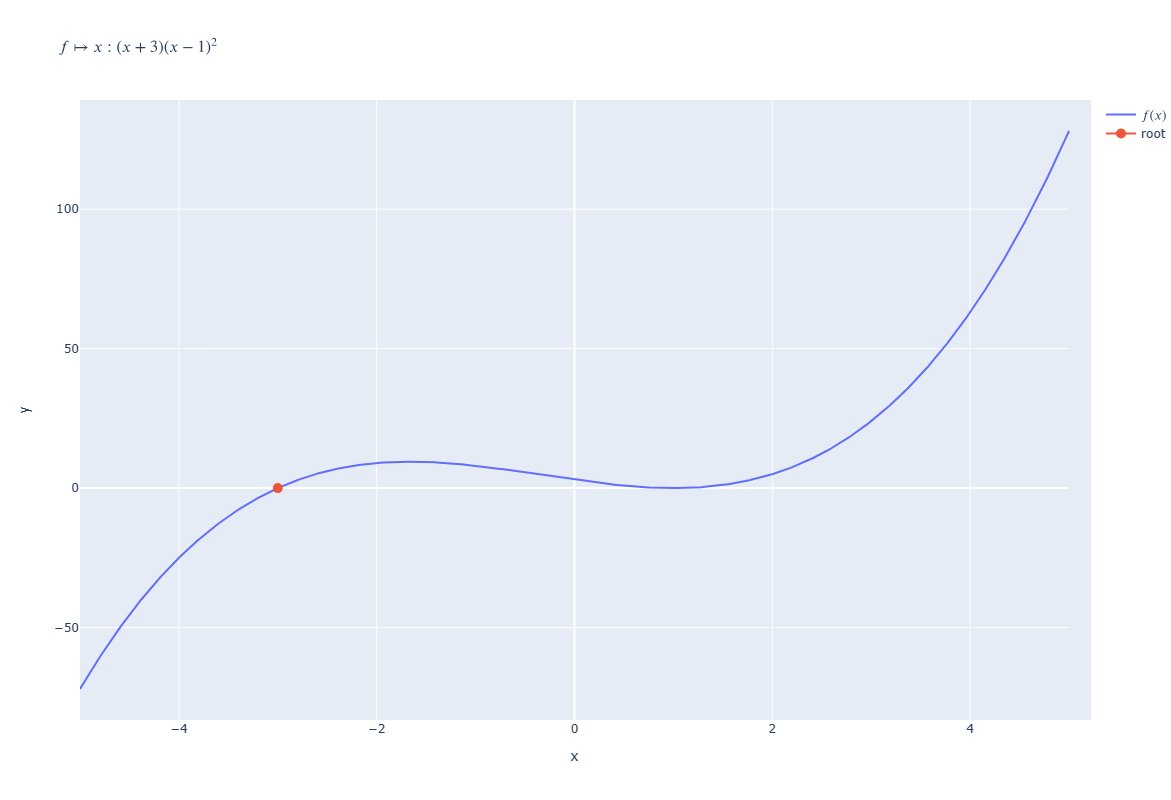

In [142]:
fig = go.Figure(data=[{'type': 'scatter', 'x': np.linspace(-5.0,5.0,1000), 'y': f(np.linspace(-5.0,5.0,1000)),
                       'name': '$f(x)$', 'showlegend':True}],
                layout = {'title': '$f \mapsto x: (x+3)(x-1)^2$','height':800, 'width':1100 })
fig.add_trace(go.Scatter(x=[root], y=[0], marker = {'size':10}, name = "root"))
fig.update_xaxes(title_text="x")
fig.update_yaxes(title_text="y")
fig.show()